# Introduction

The present project aims to study some aspects of the population of Ireland according to information from the 2016 Irish Census. A national census is conducted by the Central Statistics Office (CSO) usually every 5 years. Questions comprise a number of different aspects relevant to life in the country, e.g., the Irish language and migration and ethnicity. A new census is due to happen on 3rd April 2022. As such, the 2016 Irish Census contains the most recent profile of the population of Ireland to date.

The census is divided into 15 general themes. Each of them is further subdivided into specific questions with a range of possible answers. The number of people associated with each answer is then recorded. The information is arranged into three different categories: county, electoral area and small area. This allows for an investigation of the census variables in different geographical scales. 

The present report focus on the county scale. Two lines of investigation are adressed. First, a study of the Catholic tradition in Ireland and how it is represented nowadays is performed through data visualization. A similar analysis is then used to assess research in the country through the number of people with a PhD degree or higher. Correlations between those two aspects of Irish society are then established and four different AI models  - linear regression, SVM, random forest and decision tree - are used to predict the latter from the former. The second investigation deals with how the Irish language still survives through people today. Visualizations are used to show the distribution of Irish speakers across the country. A k-means clustering algorithm is then used to look for patterns in the data. Comparisons are made between the clusters found and the geographical location of counties on the island.

The work is divided into 5 sections. In section 2, the dataset to be used is presented and formatted in order to make later analyses easier. Section 3 then comprises a study on the number of Catholics and PhD graduates in Ireland. Section 4 goes on to investigate clusters in the number of Irish speakers across counties. Finally, section 5 summarizes and concludes the work.

# Dataset presentation and preparation

In [1]:
import numpy as np # Some Python modules used throughout the report
import numpy.random as npr
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

The 2016 Irish Census data is organized into three different geographical scales: county, electoral area and small area. The present report deals with the county data.

In [2]:
path = 'C:/Users/thiag/Documents/STAT40800 - Data Prog with Python/Final_Project/' # File directory

county = pd.read_csv(path+'Census_by_county.csv',encoding='iso-8859-1') # Census variables per county
print('First 10 observations in the dataset:\n',county.head(10),'\n') # First 10 observations
print('Dimensions of dataset:',county.shape) # Size of dataset

First 10 observations in the dataset:
                                    GUID    GEOGID                GEOGDESC  \
0  EB9428B8-B443-407E-977B-9393FD73E1D0  CTY31_CC               Cork City   
1  84B85B58-010E-45DB-BC55-E137BBE627E4  CTY31_CE                   Clare   
2  8A998E65-D3BE-4620-98DE-EBF44DE0285B  CTY31_CK             Cork County   
3  F1CE5AB6-2A36-4E32-B04A-E79CCD016BCE  CTY31_CN                   Cavan   
4  D3A82C01-E07A-4554-8FE4-355EBB161F5A  CTY31_CW                  Carlow   
5  EC7DF314-E9AD-4B31-B76C-E3CE8796A87C  CTY31_DC             Dublin City   
6  BCD3C654-AD8A-411B-BCD7-D2C210A9AB28  CTY31_DL                 Donegal   
7  8CD118DF-9362-4D15-8028-16CB016E942C  CTY31_DR  Dún Laoghaire-Rathdown   
8  DA8A143E-499D-4407-AE87-36E6C9F68EF9  CTY31_FL                  Fingal   
9  FA241879-9706-4005-BFD7-FBF80C56C6EE  CTY31_GC             Galway City   

  T1_1AGE0M T1_1AGE1M T1_1AGE2M T1_1AGE3M T1_1AGE4M T1_1AGE5M T1_1AGE6M  ...  \
0       720       614       613  

Although there are 26 counties in the Republic of Ireland, some of them are divided into smaller regions in the census. For example, County Cork is represented as Cork City and Cork County. Another example is County Dublin, which is divided into Dublin City, Fingal, South Dublin and Dún Laoghaire-Rathdown. As a consequence, there are actually 31 observations in the dataset. On the other hand, there are 799 variables representing answers to questions. In order to manipulate the dataset more easily, it is convenient to get rid of the first two columns and add the counties' names as indices in the data frame.

In [3]:
county = county.drop(['GUID','GEOGID'],axis=1) # Delete firt two variables
county = county.rename(columns={'GEOGDESC':'COUNTY'}) # Change name of first variable
county = county.rename(index=county.COUNTY) # Rename indices as the counties' names
print('Glimpse of the formatted dataset: \n',county.head()) # First 5 observations

Glimpse of the formatted dataset: 
                   COUNTY T1_1AGE0M T1_1AGE1M T1_1AGE2M T1_1AGE3M T1_1AGE4M  \
Cork City      Cork City       720       614       613       645       602   
Clare              Clare       762       759       780       842       868   
Cork County  Cork County     2,957     3,154     3,174     3,324     3,365   
Cavan              Cavan       539       540       566       636       608   
Carlow            Carlow       349       440       383       426       459   

            T1_1AGE5M T1_1AGE6M T1_1AGE7M T1_1AGE8M  ... T15_1_TC  T15_2_Y  \
Cork City         643       647       598       565  ...   49,370   30,466   
Clare             843       929       954       951  ...   43,348   29,214   
Cork County     3,579     3,628     3,543     3,478  ...  146,052  103,617   
Cavan             671       635       680       643  ...   26,806   17,286   
Carlow            475       442       455       474  ...   20,465   13,242   

            T15_2_N T15_2_

Another step must be taken before continuing. Some numbers in the data are actually stored as strings. Thus, all numeric quantities must first be converted to integers.

In [4]:
# Example of a number stored as a string
print('Type of',county.iloc[1,1],':',type(county.iloc[1,1])) 

Type of 762 : <class 'str'>


In [5]:
def convert(s): # Convert string to integer where necessary
    if type(s) == int:
        return s
    else:
        return int(s.replace(",",""))

for i in range(1,len(county.columns)):
    county.iloc[:,i] = county.iloc[:,i].apply(convert)
    
print('Glimpse of formatted dataset:\n',county.head()) # First 5 observations

Glimpse of formatted dataset:
                   COUNTY  T1_1AGE0M  T1_1AGE1M  T1_1AGE2M  T1_1AGE3M  \
Cork City      Cork City        720        614        613        645   
Clare              Clare        762        759        780        842   
Cork County  Cork County       2957       3154       3174       3324   
Cavan              Cavan        539        540        566        636   
Carlow            Carlow        349        440        383        426   

             T1_1AGE4M  T1_1AGE5M  T1_1AGE6M  T1_1AGE7M  T1_1AGE8M  ...  \
Cork City          602        643        647        598        565  ...   
Clare              868        843        929        954        951  ...   
Cork County       3365       3579       3628       3543       3478  ...   
Cavan              608        671        635        680        643  ...   
Carlow             459        475        442        455        474  ...   

             T15_1_TC  T15_2_Y  T15_2_N  T15_2_NS  T15_2_T  T15_3_B  \
Cork City     

The data is now ready for the analyses in the next two sections.

# Correlations between Catholicism and PhD research

Ireland is widely known for its Catholic tradition. Saint Patrick, the country's patron saint, is traditionally credited for having spread Catholicism across the island. He is celebrated alongside Irish culture on 17th March in a holiday named after him. His and other saints' memories are still alive through many old churches and monasteries around the land. Catholicism is therefore an important aspect of Irish life and the census acknowledges that. Figure 1 shows how the religion spreads across the counties.

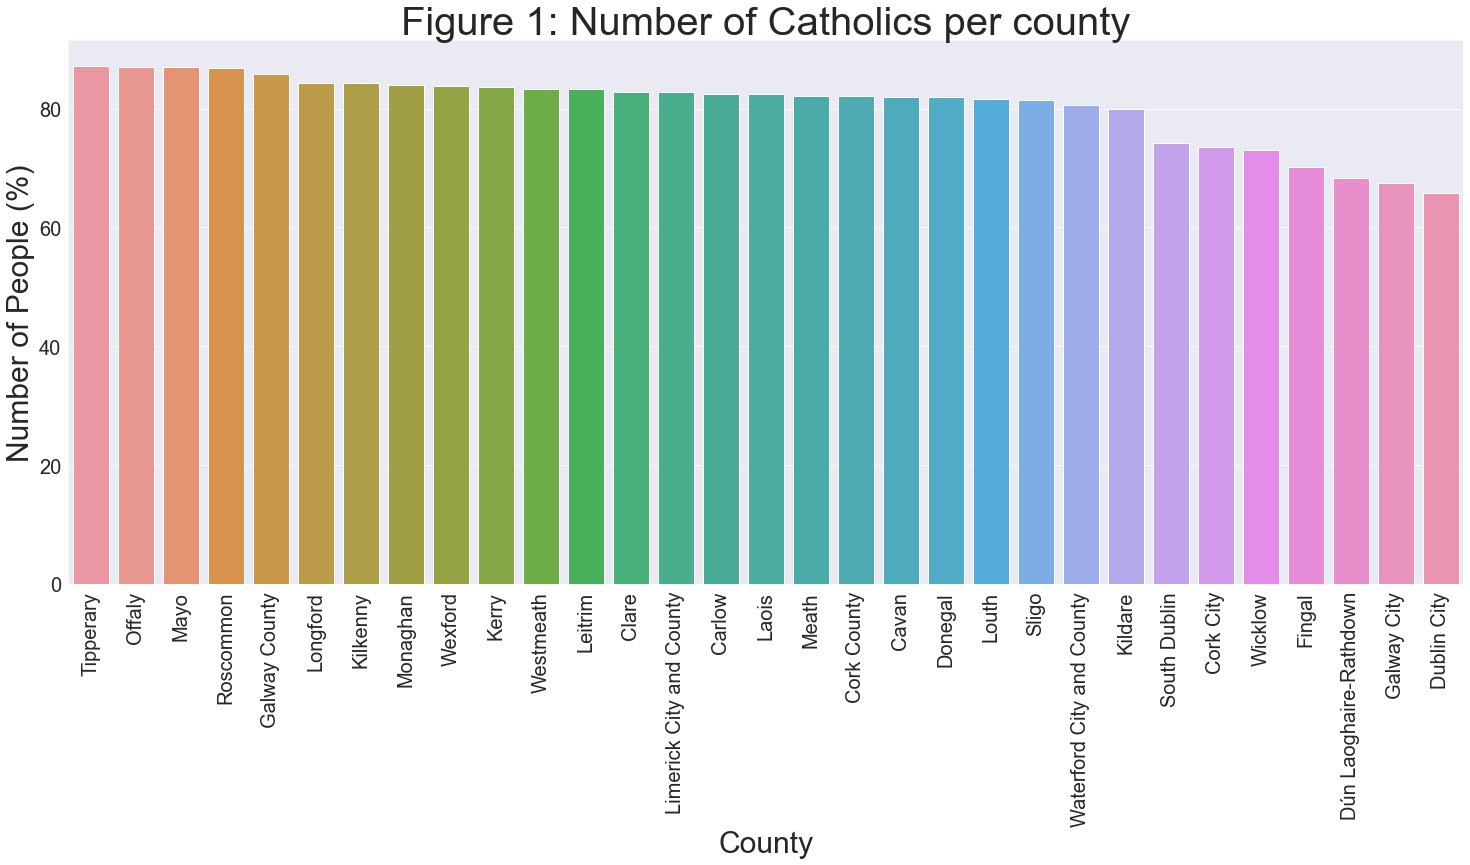

In [6]:
# The variables of interest here are: COUNTY - county name, T1_1AGETT - Total number of people per county, T2_4CA - Number of Catholics per county and T10_4_DT - Number of people with a PhD degree or higher

# Selecting and renaming variables of interest
analysisI = county.loc[:,['COUNTY','T1_1AGETT','T2_4CA','T10_4_DT']]
analysisI = analysisI.rename(columns={'T1_1AGETT':'number_people','T2_4CA':'number_catholic','T10_4_DT':'number_PhD'})

# Calculating percentages
analysisI['number_catholic'] = analysisI['number_catholic']/analysisI['number_people']*100
analysisI['number_PhD'] = analysisI['number_PhD']/analysisI['number_people']*100

# Plotting 
sns.set_style('darkgrid')

plt.figure(figsize=(25,10))
sns.barplot(x="COUNTY", y="number_catholic", data=analysisI,order=analysisI.sort_values('number_catholic',ascending = False).COUNTY)

plt.xticks(rotation=90,size=20)
plt.yticks(size=20)
plt.xlabel('County',size=30)
plt.ylabel('Number of People (%)',size=30)
plt.title('Figure 1: Number of Catholics per county',size=40)

plt.show()

In [7]:
# Statistics of Figure 1
analysisI['number_catholic'].describe()

count    31.000000
mean     80.470274
std       6.019102
min      65.837592
25%      80.198759
50%      82.502332
75%      83.898840
max      87.098331
Name: number_catholic, dtype: float64

Figure 1 shows that Catholicism is indeed still quite widespread across the country. The average percentage number of Catholics is around 80.47% with a standard deviation of 6.02%. Most counties stand above the 80% mark. Tipperary is the most Catholic county (87.10%) while Dublin City is the least Catholic county (65.84%). Although the latter appears at the bottom, all other County Dublin subdivisions - Fingal, South Dublin and Dún Laoghaire-Rathdown - are also low on the ranking.

Ireland is at the same time also known for its research and scientific development. For example, two important figures in the exact sciences are William Rowan Hamilton, who discovered quaternions and made important contributions in classical mechanics, and George Stokes, after whom an important mathematical theorem in vector calculus is named. Moreover, universities such as University College Dublin and Trinity College Dublin are worldly-renowned institutions that attract both national and international researchers. Such academic culture is also captured by the census. Figure 2 shows the number of people with a PhD degree or higher per county.

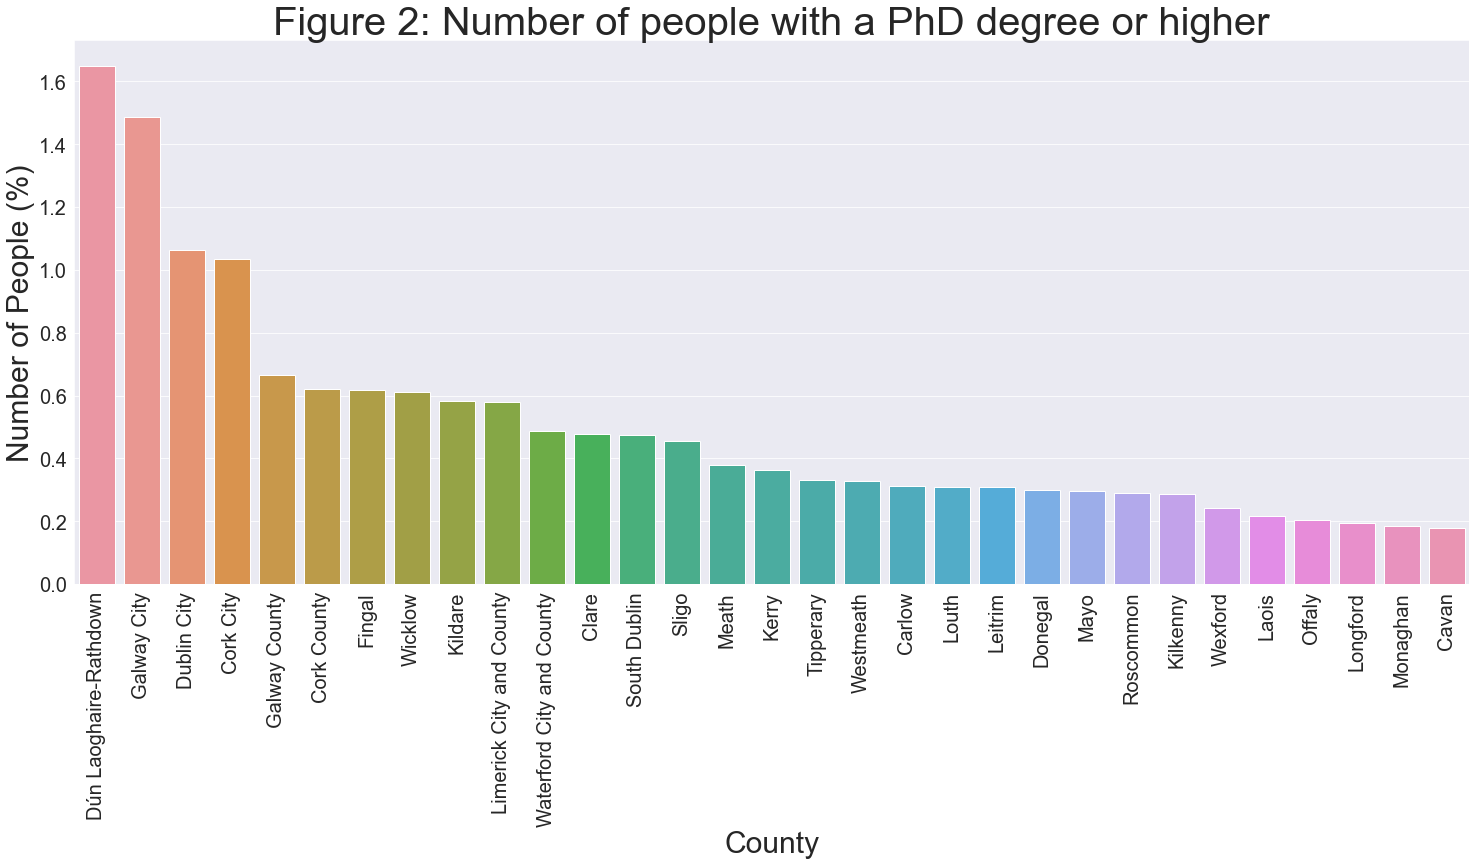

In [8]:
# Plotting
plt.figure(figsize=(25,10))
sns.barplot(x="COUNTY", y="number_PhD", data=analysisI,order=analysisI.sort_values('number_PhD',ascending = False).COUNTY)

plt.xticks(rotation=90,size=20)
plt.yticks(size=20)
plt.xlabel('County',size=30)
plt.ylabel('Number of People (%)',size=30)
plt.title('Figure 2: Number of people with a PhD degree or higher',size=40)

plt.show()

In [9]:
# Statistics of Figure 2
analysisI['number_PhD'].describe()

count    31.000000
mean      0.500945
std       0.359613
min       0.179847
25%       0.292364
50%       0.362204
75%       0.597230
max       1.647570
Name: number_PhD, dtype: float64

Figure 2 shows that the great majority of PhD graduates are concentrated in and around cities with important universities. County Dublin subdivisions appear on the top of the ranking, with Dún Laoghaire-Rathdown having 1.65% of its population as doctors. As mentioned already, this is due to the fact that Dublin is home to University College Dublin and Trinity College Dublin, among other important institutions. Following are Galway City and Cork City, which host National University of Ireland Galway (NUIG) and University College Cork (UCC), respectively. County Cavan stands on the bottom of the ranking with only 0.18% of its population having a PhD degree or higher.

Figure 1 and Figure 2 suggest that some of the least Catholic counties (e.g. Dublin City) are also the ones with more PhD graduates and vice versa. The correlation between those two variables is shown in Figure 3. 


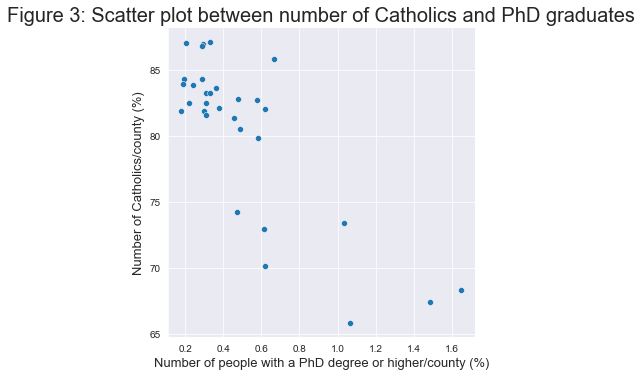

Correlation coefficient: -0.8117792470537659


In [10]:
# Plotting
sns.relplot(x="number_PhD", y="number_catholic", data=analysisI);
plt.xlabel('Number of people with a PhD degree or higher/county (%)',size=13)
plt.ylabel('Number of Catholics/county (%)',size=13)
plt.title('Figure 3: Scatter plot between number of Catholics and PhD graduates',size=20)

plt.show()

print('Correlation coefficient:',analysisI.number_PhD.corr(analysisI.number_catholic))

Figure 3 indeed shows a strong negative correlation: there is a general tendency for counties with many Catholics to have few PhD graduates. This relationship can be further explored using AI models. In the following, four different algorithms - linear regression, SVM, random forest and decision tree - are used to try to predict the number of doctors based on the number of Catholics. The first 23 observations (roughly 75% of the dataset) are used as the training set. Counties appear alphabetically in the data but numerical variables are not arranged in any particular order. Figure 4 summarizes the performance of each method.

In [58]:
# Model setup

X = analysisI['number_catholic'] # Predictor
y = analysisI['number_PhD'] # Response

# Standardize predictor
X_std = (X-X.mean())/X.std() 

# Get observations for training set
N = len(y)
f = 0.75 # Percentage of observations in the training set (roughly)
N_train = int(np.floor(f*N)) # Number of observations in the training set
print('Number of training observations:',N_train)
print('Number of test observations:',N-N_train)

X_train = X_std.iloc[:N_train] # Training set predictors
X_test = X_std.iloc[N_train:] # Test set predictors

y_train = y[:N_train] # Training set responses
y_test = y[N_train:] # Test set responses

Number of training observations: 23
Number of test observations: 8


Root-mean-square error - Linear regression: 0.1936835628208829
Root-mean-square error - SVM: 0.19350595624674785
Root-mean-square error - Random forest: 0.22842262932989046
Root-mean-square error - Decision tree: 0.2609550222252469


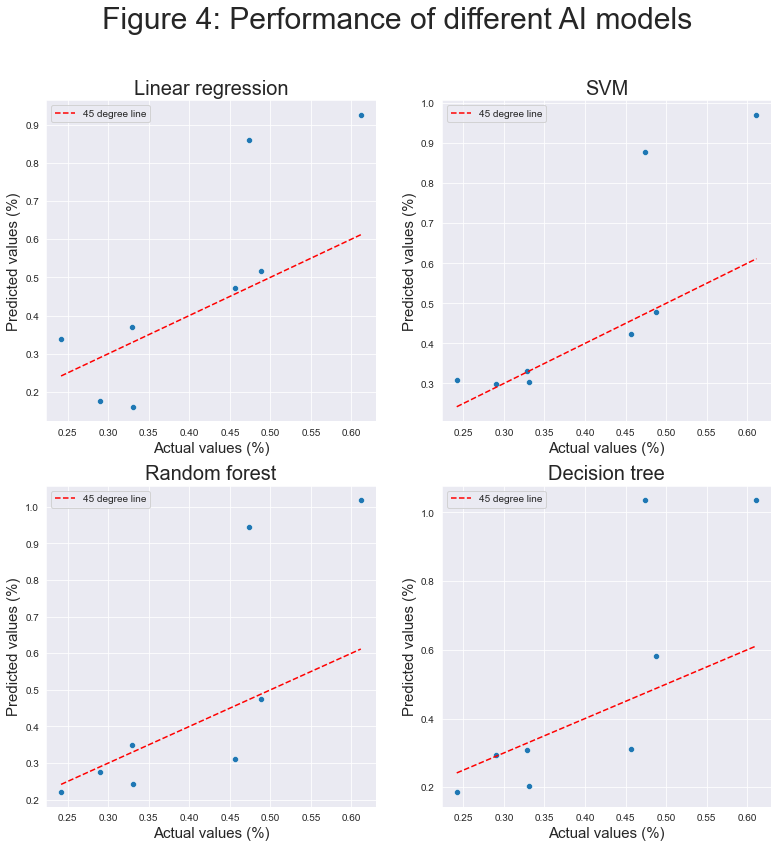

In [59]:
# Linear regression
from sklearn import linear_model

modelI1 = linear_model.LinearRegression()
modelI1.fit(X_train.values.reshape(-1,1),y_train) 
predsI1 = modelI1.predict(X_test.values.reshape(-1,1))

RMSEI1 = np.sqrt(np.mean((predsI1 - y_test)**2))
print('Root-mean-square error - Linear regression:',RMSEI1)

# SVM
from sklearn import svm
modelI2 = svm.SVR(gamma='scale')
modelI2.fit(X_train.values.reshape(-1,1), y_train)
predsI2 = modelI2.predict(X_test.values.reshape(-1,1))
RMSEI2 = np.sqrt(np.mean((predsI2- y_test)**2))
print('Root-mean-square error - SVM:',RMSEI2)

# Random forest
from sklearn.ensemble import RandomForestRegressor
modelI3 = RandomForestRegressor(n_estimators=100)
modelI3.fit(X_train.values.reshape(-1,1), y_train)
predsI3 = modelI3.predict(X_test.values.reshape(-1,1))
RMSEI3 = np.sqrt(np.mean((predsI3-y_test)**2))
print('Root-mean-square error - Random forest:',RMSEI3)

# Decision tree
from sklearn.tree import DecisionTreeRegressor

modelI4 = DecisionTreeRegressor(max_depth=10)
modelI4.fit(X_train.values.reshape(-1,1),y_train)
predsI4 = modelI4.predict(X_test.values.reshape(-1,1))
RMSEI4 = np.sqrt(np.mean((predsI4-y_test)**2))
print('Root-mean-square error - Decision tree:',RMSEI4)

# Plotting results
figI, axI = plt.subplots(2,2,figsize=(13,13))

sns.scatterplot(ax=axI[0,0],x=y_test,y=predsI1)
axI[0,0].plot(np.linspace(min(y_test),max(y_test),100),np.linspace(min(y_test),max(y_test),100),'r--',label='45 degree line')
axI[0,0].set_xlabel('Actual values (%)',size=15)
axI[0,0].set_ylabel('Predicted values (%)',size=15)
axI[0,0].legend()
axI[0,0].set_title('Linear regression',size=20)

sns.scatterplot(ax=axI[0,1],x=y_test,y=predsI2)
axI[0,1].plot(np.linspace(min(y_test),max(y_test),100),np.linspace(min(y_test),max(y_test),100),'r--',label='45 degree line')
axI[0,1].set_xlabel('Actual values (%)',size=15)
axI[0,1].set_ylabel('Predicted values (%)',size=15)
axI[0,1].legend()
axI[0,1].set_title('SVM',size=20)

sns.scatterplot(ax=axI[1,0],x=y_test,y=predsI3)
axI[1,0].plot(np.linspace(min(y_test),max(y_test),100),np.linspace(min(y_test),max(y_test),100),'r--',label='45 degree line')
axI[1,0].set_xlabel('Actual values (%)',size=15)
axI[1,0].set_ylabel('Predicted values (%)',size=15)
axI[1,0].legend()
axI[1,0].set_title('Random forest',size=20)

sns.scatterplot(ax=axI[1,1],x=y_test,y=predsI4)
axI[1,1].plot(np.linspace(min(y_test),max(y_test),100),np.linspace(min(y_test),max(y_test),100),'r--',label='45 degree line')
axI[1,1].set_xlabel('Actual values (%)',size=15)
axI[1,1].set_ylabel('Predicted values (%)',size=15)
axI[1,1].legend()
axI[1,1].set_title('Decision tree',size=20)

figI.suptitle('Figure 4: Performance of different AI models',size=30)

plt.show()

In Figure 4, the 45 degree line has been plotted for reference: all points would lie on it if the models were ideally perfect. All four algorithms have a similar overall performance on the dataset. For small values of the percentage number of PhD graduates, the predictions are more accurate (bottom left in all plots in Figure 4). On the other hand, the highest and third highest points are overestimated by all models. This happens because these two points are more spread out when compared to the other ones, as can be seen in Figure 5. The predicted values are thus higher as they would be more aligned with the training set.

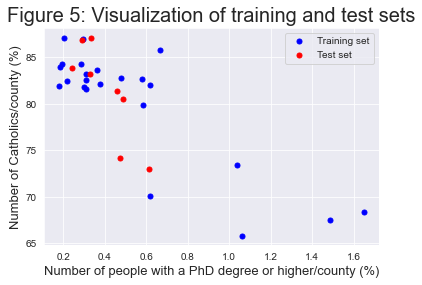

In [91]:
# Plotting training and test sets
plt.scatter(y_train,X[:N_train],color='b',s=25,label='Training set');
plt.scatter(y_test,X[N_train:],color='r',s=25,label='Test set');
plt.xlabel('Number of people with a PhD degree or higher/county (%)',size=13)
plt.ylabel('Number of Catholics/county (%)',size=13)
plt.title('Figure 5: Visualization of training and test sets',size=20)
plt.legend()

plt.show()

# Distribution of Irish speakers across Ireland

There are two official languages in Ireland: English and Irish. Although the latter was originally the native language in the country, its use in daily life slowly gave way to the former after many years under the English rule. Nowadays, Irish is rarely spoken but can still be spotted around the country, e.g., on signs on the streets. However, in order to keep such a rich cultural heritage alive, the language is taught in schools and Irish people still know their ways with it. The census keeps track of how many Irish speakers there are and how the language survives today. Figure 6 shows the distribution of those people across Ireland.

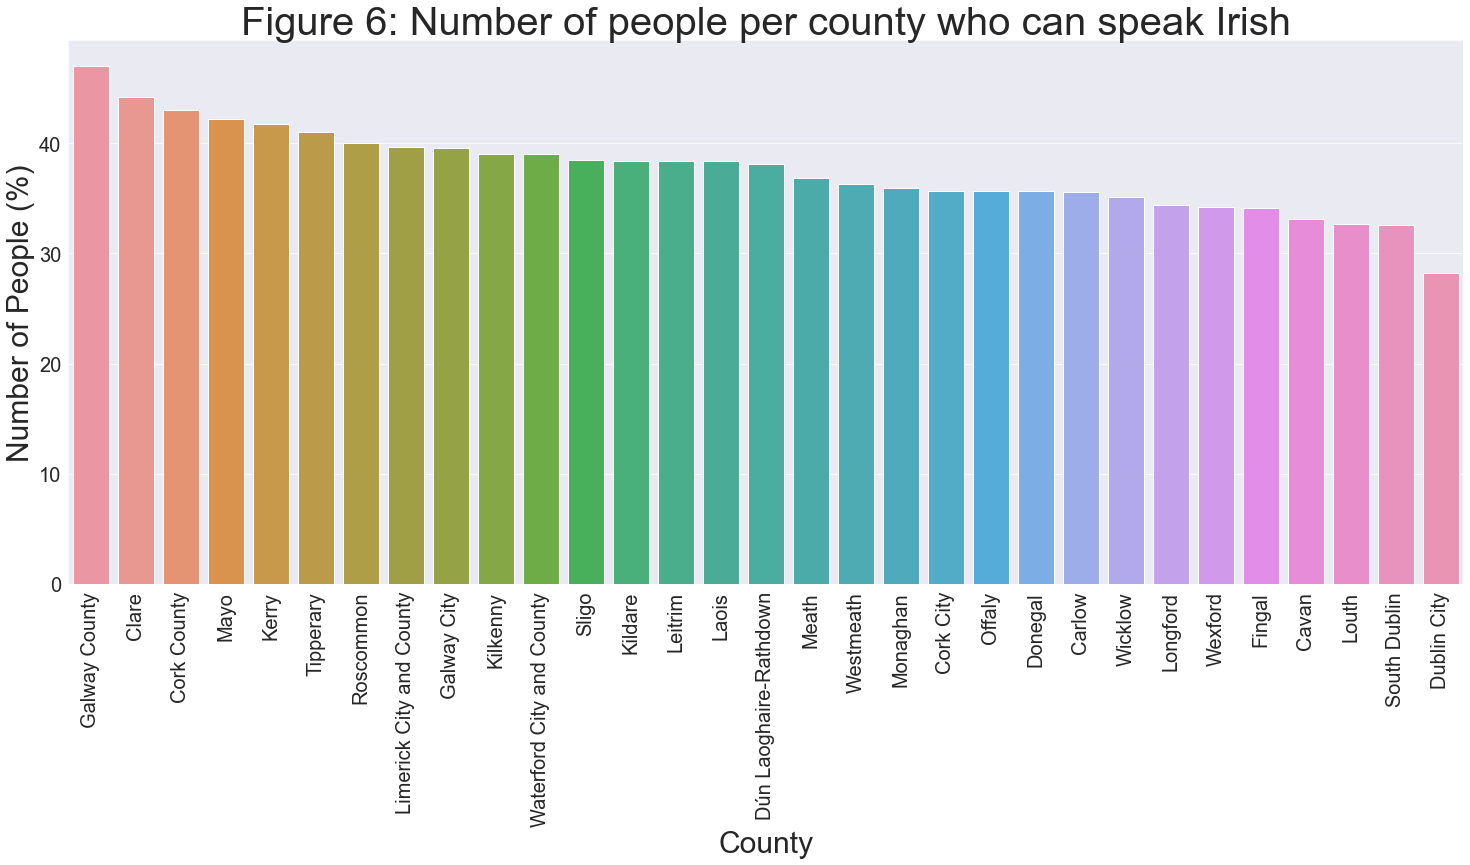

In [92]:
# The variables of interest here are: COUNTY - county name, T1_1AGETT - Total number of people per county and T3_1YES - Number of people per county who can speak Irish

# Selecting and renaming variables of interest
analysisII = county.copy()
analysisII = analysisII.loc[:,['COUNTY','T1_1AGETT','T3_1YES']] # Selecting variables of interest
analysisII = analysisII.rename(columns={'T1_1AGETT':'number_people','T3_1YES':'number_speak_Irish'}) # Renaming variables

# Calculating percentages
analysisII['number_speak_Irish'] = analysisII['number_speak_Irish']/analysisII['number_people']*100

# Plotting
plt.figure(figsize=(25,10))
sns.barplot(x="COUNTY", y="number_speak_Irish", data=analysisII,order=analysisII.sort_values('number_speak_Irish',ascending = False).COUNTY)
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)
plt.xlabel('County',size=30)
plt.ylabel('Number of People (%)',size=30)
plt.title('Figure 6: Number of people per county who can speak Irish',size=40)


plt.show()

In [93]:
# Statistics of Figure 6
analysisII['number_speak_Irish'].describe()

count    31.000000
mean     37.545280
std       3.870845
min      28.209336
25%      35.315527
50%      38.149144
75%      39.626157
max      46.964156
Name: number_speak_Irish, dtype: float64

Figure 6 shows that less than 50% of the population in all counties are able to speak Irish. Galway County stands on the top of the ranking with 46.96% Irish speakers whereas Dublin City sits on the opposite end with only 28.21% of its inhabitants being able to speak the language. The overall average across counties is 37.55% with a standard deviation of 3.87%.

In order to look for patterns in the data, a k-means clustering algorithm with two clusters is performed. The results are shown in Figure 7.

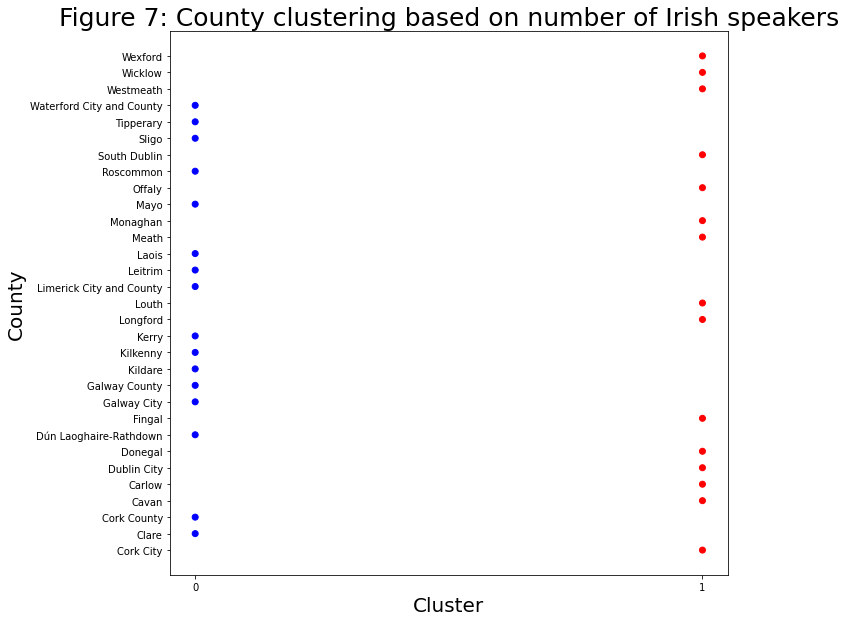

In [95]:
points = analysisII.copy()

# k-means clustering
from sklearn.cluster import KMeans

modelII = KMeans(n_clusters=2) # Look for two clusters
modelII.fit(points['number_speak_Irish'].values.reshape(-1,1))
points['Prediction'] = modelII.predict(points['number_speak_Irish'].values.reshape(-1,1))

# Plotting
def change_Prediction(x): # Choose colors for plot
    aux = []
    for i in range(len(x)):
        if x[i] == 0:
            aux.append('b')
        else: 
            aux.append('r')
    return aux

sns.reset_orig()
plt.figure(figsize=(10,10))
plt.scatter(points['Prediction'], points['COUNTY'], c=change_Prediction(points['Prediction'].values))
plt.xlabel('Cluster',size=20)
plt.ylabel('County',size=20)
plt.xticks(ticks=[0,1])
plt.title('Figure 7: County clustering based on number of Irish speakers',size=25)

plt.show()

A comparison is now made between the two clusters found and the classification of Irish counties between east and west used in [1]. The plots are shown side by side in Figure 8.

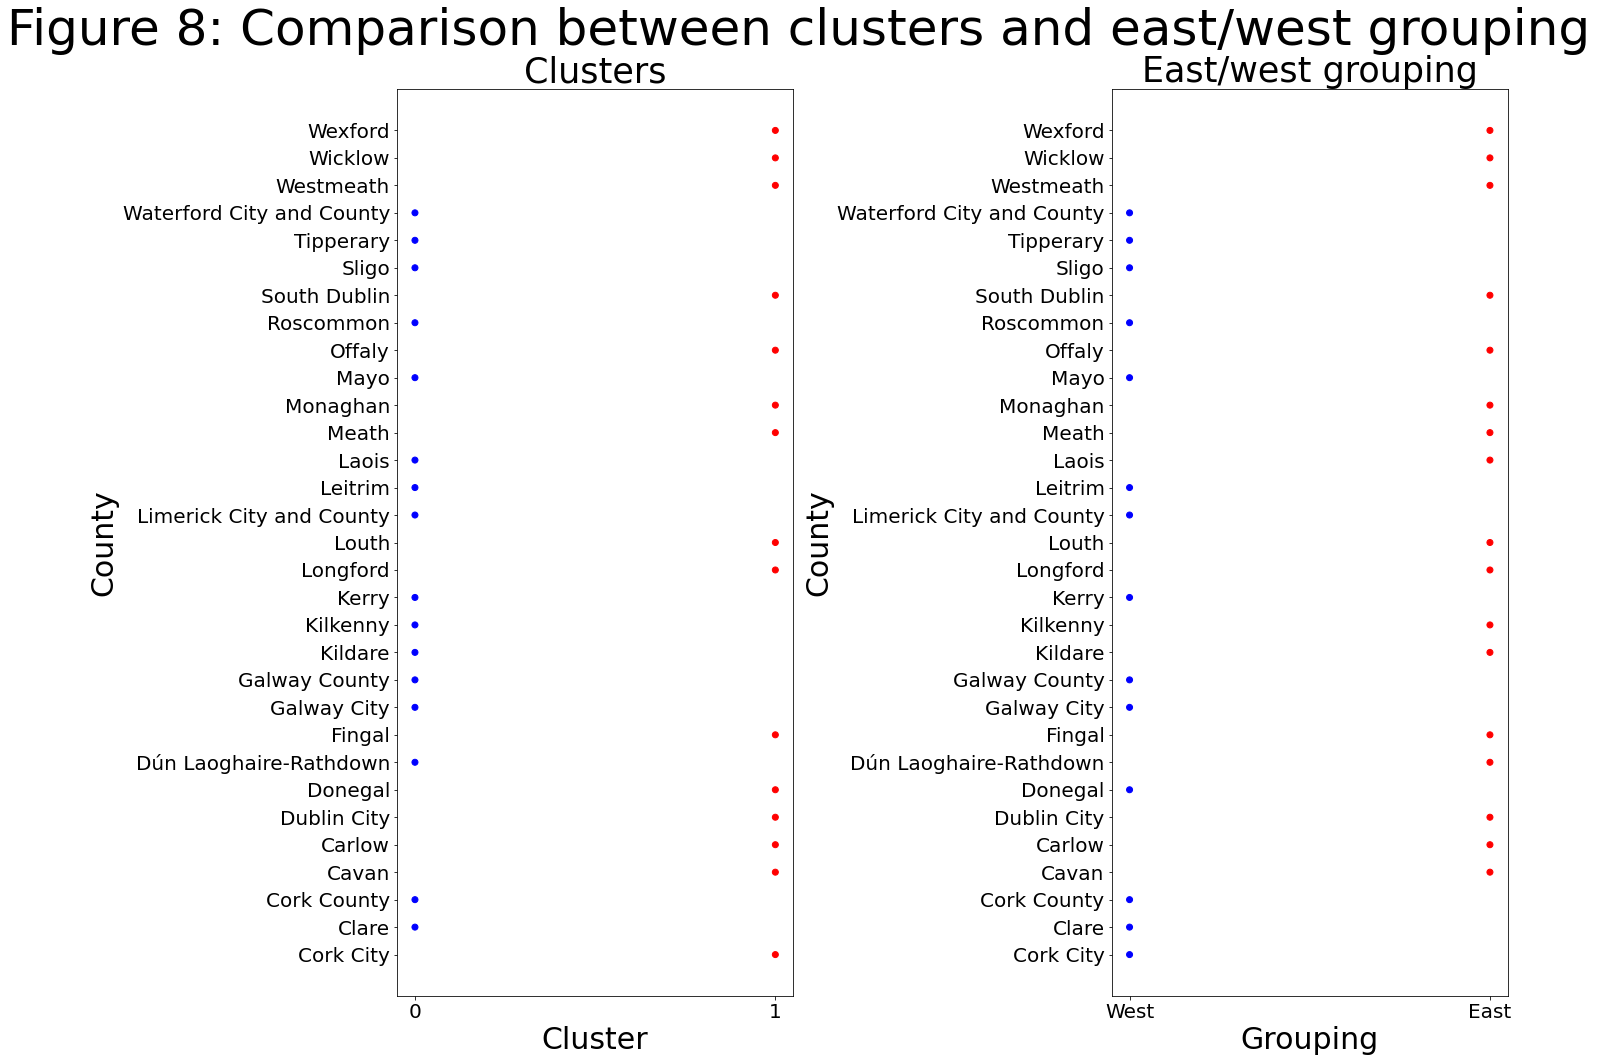

In [97]:
# Adding east/west data
points['E_W'] = ['W', 'W', 'W', 'E', 'E', 'E', 'W', 'E', 'E', 'W', 'W', 'E', 'E', 'W', 'E', 'E', 'W', 'W', 'E', 'E', 'E', 'W', 'E', 'W', 'E', 'W', 'W', 'W', 'E', 'E', 'E']

# Plotting
def change_E_W(x): # I chose 'W' as blue and 'E' as red arbitrarily. Other choices will change the colors in the final plot but not the groupings
    aux = []
    for i in range(len(x)):
        if x[i] == 'W':
            aux.append('b')
        else: 
            aux.append('r')
    return aux

figII, axII = plt.subplots(1,2,figsize=(20,15))

axII[0].scatter(points['Prediction'], points['COUNTY'], c=change_Prediction(points['Prediction'].values))
axII[0].set_xlabel('Cluster',size=30)
axII[0].set_ylabel('County',size=30)
axII[0].set_xticks(ticks=[0,1],labels=['0','1'],fontsize=20)
axII[0].set_yticks(ticks=points['COUNTY'],labels=points['COUNTY'],fontsize=20)
axII[0].set_title('Clusters',size=35)

axII[1].scatter(points['E_W'], points['COUNTY'], c=change_E_W(points['E_W'].values)) 
axII[1].set_xlabel('Grouping',size=30)
axII[1].set_ylabel('County',size=30)
axII[1].set_xticks(ticks=['W','E'],labels=['West','East'],fontsize=20)
axII[1].set_yticks(ticks=points['COUNTY'],labels=points['COUNTY'],fontsize=20)
axII[1].set_title('East/west grouping',size=35)

figII.suptitle('Figure 8: Comparison between clusters and east/west grouping', fontsize=50)
figII.tight_layout()

plt.show()

There is a strong similarity between the clusters and the east/west grouping. This suggests that Ireland can be roughly divided according to the number of Irish speakers: most of those people are on the west while the east comprises a lesser amount of them. However, the association is not perfect, as can be seen in Figure 8. For example, Kilkenny and Kildare are clustered together with Galway County and Clare according to the number of Irish speakers even though they actually lie on the east rather than on the west.

# Conclusion

The present project dealt with the 2016 Irish Census, a dataset that comprises many different aspects of life in Ireland. Two lines of investigation were pursued. First, it was found that the percentage number of Catholics per county is strongly (negatively) correlated to the percentage number of people with a PhD degree or higher per county. Building on such a strong relationship, AI models were trained to predict the latter from the former. They performed fairly well except for specific points where the data is more scattered. Next, the number of people who can speak Irish per county was investigated. A clustering algorithm was able to divide the data into two clusters. These were found to roughly correspond to the east and west of Ireland for counties with fewer Irish speakers and more Irish speakers, respectively. The result suggests that the Irish language survives more vigorously in the west of the country. Explorations like the ones described in this work help in picturing a profile of the population of Ireland and, in a much higher level, also guide governmental decisions.

# References

[1] Reid, N., Dingerkus, K., Montgomery, W.I., Marnell, F., Jeffrey, R., Lynn, D., Kingston, N. & McDonald, R.A. (2007) Status of hares in Ireland. Irish Wildlife Manuals, No. 30. National Parks and Wildlife Service, Department of Environment, Heritage and Local Government, Dublin, Ireland.